In [16]:
import keras
keras.__version__

'2.1.6'

In [17]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [18]:
print(train_data[:2])

[ list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,

In [19]:
train_labels[0]

1

In [20]:
a = [max(sequence) for sequence in train_data]

In [21]:
a[:5]

[7486, 9837, 6905, 9941, 7224]

In [22]:
## write function to vectorize input data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)    
x_test = vectorize_sequences(test_data)

In [23]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [24]:
len(x_train[0])

10000

In [25]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [26]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [27]:
print(y_train[:5])

[ 1.  0.  0.  1.  0.]


In [28]:
## build network
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
## loss function, optimizer, metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.5085 - binary_accuracy: 0.7813 - val_loss: 0.3796 - val_binary_accuracy: 0.8687
Epoch 2/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.3006 - binary_accuracy: 0.9043 - val_loss: 0.3003 - val_binary_accuracy: 0.8899
Epoch 3/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.2180 - binary_accuracy: 0.9289 - val_loss: 0.3080 - val_binary_accuracy: 0.8719
Epoch 4/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1751 - binary_accuracy: 0.9436 - val_loss: 0.2839 - val_binary_accuracy: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.1426 - binary_accuracy: 0.9543 - val_loss: 0.2847 - val_binary_accuracy: 0.8866
Epoch 6/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1150 - binary_accuracy: 0.9652 - val_loss: 0.3155 - val_binary_

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

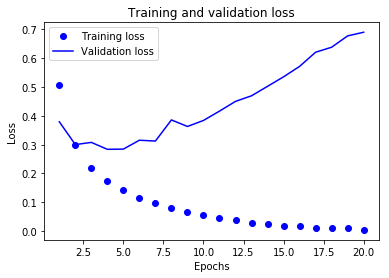

In [33]:
## plot training loss vs validation loss
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


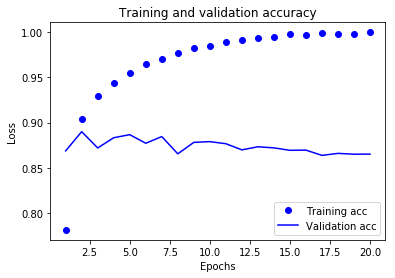

In [34]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [35]:
## train until 4 epochs to avoid overfitting
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.4750 - acc: 0.8215
Epoch 2/4
25000/25000 [==============================] - 1s 51us/step - loss: 0.2665 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 1s 50us/step - loss: 0.1986 - acc: 0.9290
Epoch 4/4
25000/25000 [==============================] - 2s 63us/step


In [36]:
results

[0.32540507376670835, 0.87275999999999998]

In [37]:
model.predict(x_test)

array([[ 0.13728099],
       [ 0.99971133],
       [ 0.27786994],
       ..., 
       [ 0.07047926],
       [ 0.04209187],
       [ 0.47422078]], dtype=float32)